# Задание 1

In [ ]:
import numpy as np
from skimage import data, transform, io
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO


response = requests.get("https://cojo.ru/wp-content/uploads/2022/12/plachushchii-kot-pokazyvaet-klass-1.webp")
image = Image.open(BytesIO(response.content))

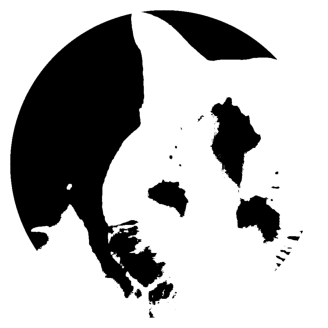

In [ ]:
image_gray = image.convert('L')
image_np = np.array(image_gray)
# 1a
threshold_value = image_np.mean()
binary_mask = image_np < threshold_value
image_np[binary_mask] = 255
image_np[~binary_mask] = 0

# 1b
ly, lx = image_np.shape
Y, X = np.ogrid[:ly, :lx]
outer_ellipse_mask = ((X - lx / 2)**2 / ((lx / 2)**2)) + ((Y - ly / 2)**2 / ((ly / 2)**2)) > 1
image_np[outer_ellipse_mask] = 255
plt.figure(figsize=(4, 4))
plt.imshow(image_np, cmap='gray')
plt.axis('off')
plt.show()

# Задание 2

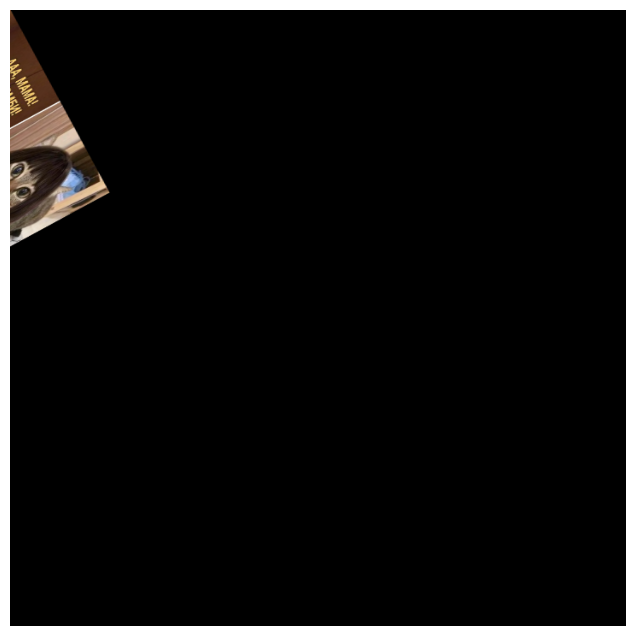

In [ ]:
response = requests.get("https://cs12.pikabu.ru/post_img/big/2022/11/30/11/1669836945169062262.jpg")
image = np.array(Image.open(BytesIO(response.content)))

scale_factor = 0.5         # тут можно и другое значение вставить
rotation_angle_degrees = 45  # как и тут
skew_angle_degrees = 30      # и тут

rotation_angle = np.deg2rad(rotation_angle_degrees)
skew_angle = np.deg2rad(skew_angle_degrees)

similarity_tform = transform.SimilarityTransform(scale=scale_factor, rotation=rotation_angle)

image_similarity_transformed = transform.warp(image, similarity_tform.inverse)

skew_tform = transform.AffineTransform(shear=np.tan(skew_angle))

image_skewed = transform.warp(image_similarity_transformed, skew_tform.inverse)

plt.figure(figsize=(8, 8))
plt.imshow(image_skewed, cmap='gray')
plt.axis('off')
plt.show()

# Задание 3

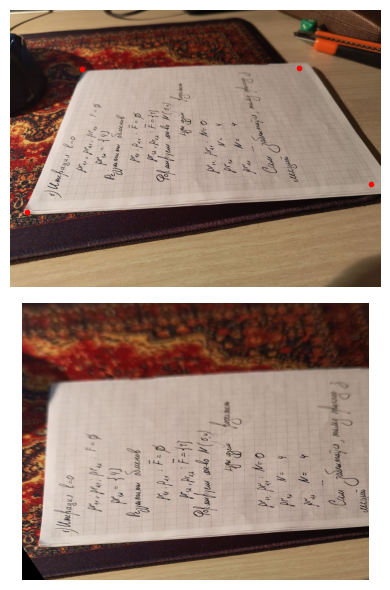

In [ ]:
response = requests.get("https://sun9-27.userapi.com/impf/fPcBB1oPu15pFnYYYcowB8-OIS-3AF2LqFv5Aw/2boKC1DqE-k.jpg?size=1280x960&quality=95&sign=8c3804446e9dcfde91fe2dd6a370f456&type=album")
image = np.array(Image.open(BytesIO(response.content)))


src = np.array([[250, 205],
                [1000, 200],
                [1250, 600],
                [60, 700]])

dst = np.array([[75, 220],
                [1200, 200],
                [1250, 600],
                [60, 700]])

tform = transform.ProjectiveTransform()
tform.estimate(src, dst)

warped = transform.warp(image, tform.inverse, output_shape=(800, 1000))

fig, ax = plt.subplots(nrows=2, figsize=(8, 6))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].plot(src[:, 0], src[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()